## Radiology 229 - Class 8 Exercises (Lectures 7A-C)

This class notebook is partly based on the 3 "Noise" notebooks in GitHub. 

Objectives:
1) Basic Noise Propagation and Appearance in Images
2) Multichannel Coil-Combined SNR

First we import basic libraries including  <code>mrsigpy</code>.


In [2]:
# -- We use the functions in mrsigpy, as well as standard numpy and matpltlib
import numpy as np
import mrsigpy as mrs
import matplotlib.pyplot as plt
#from PIL import Image


# Initial Example - Noise in k-Space and Image

We load the k-space data for an image, and just estimate the basic SNR roughly.  


Shape of ksp
(512, 512)


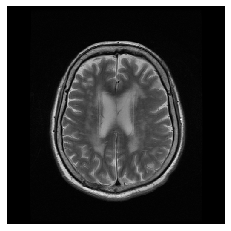

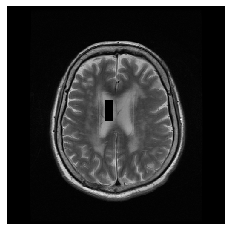

Mean:    503.28+0.00j
Std Dev: 22.31
SNRest:  22.55


In [ ]:
#

# -- To load a .mat file (MATLAB file) in Python, you can use the scipy.io module, 
# -- which provides functions to read and write MATLAB files. 

import scipy.io

# -- Load some k-space data for a real-valued 512x512 brain image
data = scipy.io.loadmat('../Data/brainksp.mat')
ksp = data['ksp']

print("Shape of ksp")
print(np.shape(ksp))

# -- Fourier transform k-space.  Here we will normalize our FFTs by sqrt(N) or N for 2D
im = mrs.ft(ksp)/512
mrs.dispim(im)

# -- Define a region in the CSF to estimate SNR, and check
imcopy = im.copy()
imcopy[221:271,231:251]=0
mrs.dispim(imcopy)

# -- Get pixels in that region from original image
roi = im[221:270,231:250]
roi_mean = np.mean(roi)
roi_stdev= np.std(roi)

# -- Rough estimate of SNR as mean/std-dev
print(f"Mean:    {roi_mean:.2f}")
print(f"Std Dev: {roi_stdev:.2f}")
print(f"SNRest:  {np.real(roi_mean/roi_stdev):.2f}")

# Add noise in k-space 

The signal is about 500, and noise std-deviation is about 22.  
In k-space we can add Gaussian, complex noise with a variance of $\sigma^2 = (50)^2$.
We then repeat the calculation above for SNR:


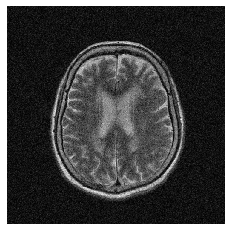

Mean:    499.73+3.24j
Std Dev: 74.46
SNRest:  6.71


In [50]:
# -- Fourier transform k-space.  Here we will normalize our FFTs by sqrt(N) or N for 2D
nstd = 50
cnoise = np.random.normal(0.0,nstd,(512,512)) + 1j*np.random.normal(0.0,nstd,(512,512))  # Complex gaussian noise sig=1

nksp = ksp+cnoise

np.random.normal()
im = mrs.ft(nksp)/512
mrs.dispim(im)

# For Exercise!
#im = np.real(im)
#im = np.abs(im)


# -- Get pixels in that region from original image
samps = im[221:271,231:251]
roi = samps.reshape((1,1000))
roi_mean = np.mean(roi)
roi_stdev= np.std(roi)

# -- Rough estimate of SNR as mean/std-dev
print(f"Mean:    {roi_mean:.2f}")
print(f"Std Dev: {roi_stdev:.2f}")
print(f"SNRest:  {np.real(roi_mean/roi_stdev):.2f}")

# Exercise 1

Go back to look at the last code section (and modify as needed!):

1.  Explain the noise standard deviation?

1.  Now take the real part of the image, repeat and explain

1.  Now take the magnitude of the image, repeat and explain

1.  Change the noise standard deviation to 100 and repeat some of these.


# Histograms

This section just makes a histogram of the noise, so you can explore the effects of different image combinations.

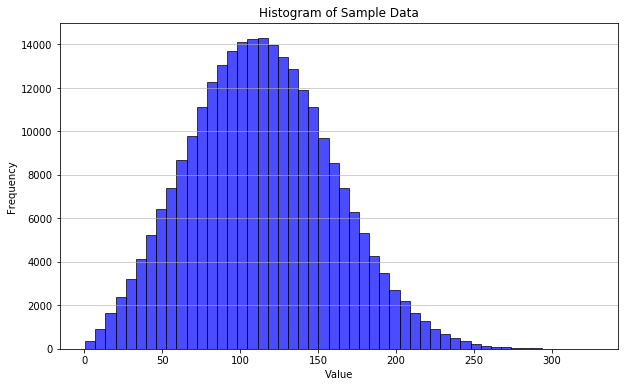

In [68]:
# -- Make a histogram of the image noise

im = mrs.ft(ksp)/512    # -- ksp
imn= mrs.ft(nksp)/512   # -- ksp + noise

# -- Magnitude images
im = np.abs(im)
imn = np.abs(imn)   # -- Note abs(im+n)

# -- Real images
#im = np.real(im)
#imn = np.real(imn)

# -- Difference to estmate noise.
imdiff = imn-im

# -- Hack here... 
imdiff = np.abs(cnoise+100)        # Show Rayleigh noise instead, comment out.

imhist = imdiff.reshape(512*512,1)

# Create a histogram
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(imhist, bins=50, color='blue', alpha=0.7, edgecolor='black')  # Create histogram

# Add titles and labels
plt.title('Histogram of Sample Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
# Show grid
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

# Exercise 2

Try playing with the sensitivities of (1) the coils and (2) the combination process to look at the overall SNR of images.

Image for Coil 1


/Users/brian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/brian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in add


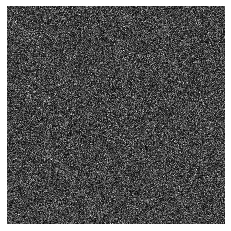

Image for Coil 2


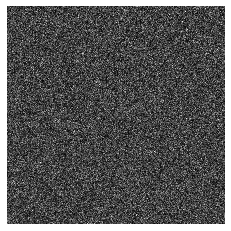

Combined Image


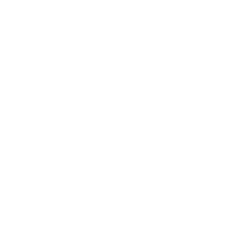

Im1 Mean:    125.72
Im1 Std Dev: 68.65
Im1 SNRest:  1.83
Combined Mean:    nan
Combined Std Dev: nan
Combined SNRest:  nan


In [ ]:
# -- Let's emulate some coils now!

c1 = 1      # Coil 1 just has sensitivity 1
c2 = 1j     # Coil 2 has sensitivity j (out of phase)

# -- Generate coil data + noise
nstd=100
cnoise1 = np.random.normal(0.0,nstd,(512,512)) + 1j*np.random.normal(0.0,nstd,(512,512))  # Complex gaussian noise sig=1
ksp1 = ksp*c1 + cnoise1
cnoise2 = np.random.normal(0.0,nstd,(512,512)) + 1j*np.random.normal(0.0,nstd,(512,512))  # Complex gaussian noise sig=1
ksp2 = ksp*c2 + cnoise2

# -- FFT images and combine
im1 = mrs.ft(ksp1)/512
im2 = mrs.ft(ksp2)/512
im = im1 + im2
im = im1/c1 + im2/c2

# -- Magnitude images
im1 = np.abs(im1)
im2 = np.abs(im2)
im = np.abs(im)

print("Image for Coil 1")
mrs.dispim(im1)
print("Image for Coil 2")
mrs.dispim(im2)




print("Combined Image")
mrs.dispim(im)

# -- Get pixels in region from image 1
samps = im1[221:271,231:251]
roi = samps.reshape((1,1000))
roi_mean = np.mean(roi)
roi_stdev= np.std(roi)

# -- Rough estimate of SNR as mean/std-dev
print(f"Im1 Mean:    {roi_mean:.2f}")
print(f"Im1 Std Dev: {roi_stdev:.2f}")
print(f"Im1 SNRest:  {np.real(roi_mean/roi_stdev):.2f}")


# -- Get pixels in region from combined image
samps = im[221:271,231:251]
roi = samps.reshape((1,1000))
roi_mean = np.mean(roi)
roi_stdev= np.std(roi)

# -- Rough estimate of SNR as mean/std-dev
print(f"Combined Mean:    {roi_mean:.2f}")
print(f"Combined Std Dev: {roi_stdev:.2f}")
print(f"Combined SNRest:  {np.real(roi_mean/roi_stdev):.2f}")


_... Continue on with "Multichannel Image Reconstruction with Noise"_



